<a href="https://colab.research.google.com/github/luciacasass/APRENDIZAJE_AUTOMATICO_23_24/blob/main/P_FINAL_AA_GRUPO3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Práctica Final


<center>

# **Vuelo Clasificado**


## Identificación de Especies de Aves Indias mediante Redes Neuronales Convolucionales

</center>


Grupo A03 -Lucía Casas Sierra, Alba López Devesa, Paula Redondo Sastre



## Introducción

En la era contemporánea de la informática y la inteligencia artificial, la aplicación de modelos avanzados como las redes neuronales convolucionales (CNN) ha revolucionado significativamente el campo de la visión por computadora. Este trabajo se adentra en la implementación de una CNN con el objetivo específico de clasificar imágenes de aves pertenecientes a 25 especies indias distintas. La vasta biodiversidad de población de aves en la India proporciona un contexto enriquecedor para explorar las capacidades y límites de las técnicas de aprendizaje profundo en la tarea de reconocimiento de especies.

**Justificación del proyecto**

La clasificación precisa de imágenes de aves mediante modelos de redes neuronales convolucionales no solo representa un avance tecnológico, sino que también tiene importantes implicaciones en términos de conservación, investigación biológica y educación ambiental. La identificación automatizada de especies de aves en entornos naturales puede contribuir significativamente a los esfuerzos de monitoreo ambiental, facilitando la recopilación de datos exhaustivos sobre la distribución y el comportamiento de estas especies.

Además, este trabajo busca abordar desafíos prácticos en la preservación de la biodiversidad, proporcionando una herramienta eficiente para el seguimiento de poblaciones de aves en peligro de extinción y la evaluación del impacto ambiental en sus hábitats. La capacidad de identificar y monitorear de manera precisa las poblaciones de aves contribuye directamente a la toma de decisiones informada en la gestión de la fauna y los recursos naturales.

Desde un punto de vista educativo, este proyecto se posiciona como una plataforma valiosa para aumentar la conciencia pública sobre la riqueza biológica de la India y fomentar la participación ciudadana en la conservación de la fauna. Además, la implementación exitosa de una CNN para clasificar aves puede sentar las bases para futuras investigaciones en el campo de la inteligencia artificial aplicada a la biología y la ecología.

En última instancia, este trabajo no solo busca perfeccionar las técnicas de clasificación de imágenes, sino que también aspira a contribuir al bienestar de la sociedad y al cuidado del medio ambiente al ofrecer herramientas innovadoras para la gestión sostenible de la biodiversidad.


**Trabajos Relacionados**

Al explorar la temática de la clasificación de imágenes de especies de pájaros, se ha identificado un conjunto significativo de trabajos en internet que comparten similitudes con el enfoque propuesto en este proyecto. Específicamente, se han identificado dos trabajos de investigación que utilizan Redes Neuronales Convolucionales (CNN) para abordar la clasificación de aves, ofreciendo valiosas perspectivas y enfoques en la aplicación de técnicas de aprendizaje profundo en este dominio.


1. **"Image based Bird Species Identification using Convolutional Neural Network" [1]**
   - *Autor(es): Satyam Raj, Saiaditya Garyali, Sanu Kumar*
   - *Resumen:* Este estudio presenta un modelo de Aprendizaje Profundo basado en Convolutional Neural Network (CNN) para identificar 60 especies de aves a partir de imágenes. Desarrollado con el objetivo de proporcionar una herramienta eficiente a los observadores de aves, el modelo logró una precisión del 93.19% en el conjunto de entrenamiento y del 84.91% en el conjunto de prueba. La investigación se llevó a cabo en Windows 10 con TensorFlow y un conjunto de datos propio obtenido mediante Microsoft’s Bing Image Search API v7.

2. **"Audio Based Bird Species Identification using Deep Learning Techniques" [2]**
   - *Autor(es): Elias Sprengel, Martin Jaggi, Yannic Kilcher, Thomas Hofmann*
   - *Resumen:* Este artículo propone un método innovador para clasificar audio y reconocer especies de aves. En lugar de utilizar enfoques tradicionales como el emparejamiento de vecinos más cercanos o árboles de decisión, los autores emplean técnicas de reconocimiento de voz en el ámbito del aprendizaje profundo. Su modelo, construido mediante una Red Neuronal Convolucional, logró una precisión del 68.6% al identificar la especie principal en archivos de sonido y del 55.5% al considerar las especies de fondo.

En la revisión de trabajos relacionados, observamos enfoques previos para clasificar especies de aves mediante aprendizaje profundo en imágenes y audio. Aunque compartimos similitudes conceptuales con estos, nuestra meta principal era mejorar la precisión en la clasificación avícola. Nuestra propuesta, que será detalladamente evaluada más adelante, ha logrado superar el 90% de precisión en el conjunto de test, marcando un avance significativo frente a trabajos previos y destacando la originalidad de nuestra contribución en este ámbito.


## Carga de datos

In [1]:
!pip install opendatasets

In [2]:
!pip install pandas

**Importación de librerías que se van a utilizar**

In [3]:
import opendatasets as od
import pandas as pd

import os
import shutil
import numpy as np
import random

import matplotlib.pyplot as plt
from collections import Counter

import glob
import cv2

from pathlib import Path
from PIL import Image

from sklearn import preprocessing

import keras
from keras.callbacks import Callback

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from tensorflow.keras.initializers import HeNormal
from tensorflow.keras.callbacks import ReduceLROnPlateau

from sklearn.metrics import confusion_matrix
import seaborn as sns

In [4]:
physical_devices = tf.config.list_physical_devices('GPU')
try:
  tf.config.experimental.set_memory_growth(physical_devices[0], True)
except:
  # Dispositivo no válido
  pass

**Selección del Conjunto de Datos:**

En la realización de este proyecto, la elección del conjunto de datos se orientó hacia Kaggle, una plataforma ampliamente reconocida por su confiabilidad y su vasta oferta de conjuntos de datos.

La base de datos seleccionada consta de imágenes de 25 especies de pájaros indios, proporcionando una representación significativa de la avifauna regional. Con un total de 22.600 imágenes, el archivo se divide de manera organizada en conjuntos de entrenamiento (train), prueba (test) y validación (val).

La elección específica de este conjunto de datos se respalda en su organización previa, donde las imágenes ya vienen clasificadas en conjuntos, facilitando el proceso de entrenamiento y evaluación del modelo. Además,la presencia de alrededor de 900 imágenes por categoría de ave proporciona un conjunto de datos equilibrado y sustancial.

El proceso para obtener directamente el conjunto de datos desde Kaggle hasta Colab implica el uso de la API de Kaggle. Para ello, se debe disponer de una cuenta registrada en Kaggle y generar una clave de API que consiste en un par de identificadores: "Username" y "Key". En el código de Python para la descarga del conjunto de datos, se incorporan instrucciones para que el usuario ingrese su nombre de usuario y clave de API de Kaggle, garantizando la seguridad y la autorización adecuada. A continuación, se presentan datos de usuario válidos para facilitar la descarga:

* **Username**: luciacasas

* **Key**: 8446c689635524f196a289f2e08dbef4

In [5]:
od.download("https://www.kaggle.com/datasets/arjunbasandrai/25-indian-bird-species-with-226k-images/code")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: luciacasas
Your Kaggle Key: ··········


100%|██████████| 9.33G/9.33G [05:06<00:00, 32.7MB/s]


## Tratamiento de los datos

Para organizar y preparar el conjunto de datos de imágenes de aves indias para su posterior procesamiento en una red neuronal convolucional (CNN), en primer lugar, se especifica la ubicación del conjunto de datos mediante la variable `data_dir`, que apunta al directorio que contiene las imágenes del conjunto de datos.

La función `load_train` se encarga de realizar la distribución de las imágenes en conjuntos de entrenamiento, validación y prueba, asignando a cada conjunto un porcentaje específico del total (70%, 15%, y 15% respectivamente). Para lograr esto, se itera sobre las carpetas de clases en el directorio del conjunto de datos, y se recopilan las rutas de las imágenes utilizando la función `glob.glob`. Cada imagen se asigna al conjunto correspondiente según la proporción establecida.

Los datos se estructuran en tres DataFrames de pandas: `dftrain` para el conjunto de entrenamiento, `dfval` para el conjunto de validación, y `dftest` para el conjunto de prueba. Cada DataFrame consta de dos columnas esenciales: "images", que representa la ruta de la imagen, y "labels", que indica la etiqueta de la clase correspondiente. La aleatorización de los datos en cada DataFrame se realiza mediante la función `sample(frac=1).reset_index(drop=True)`, lo que garantiza un entrenamiento más efectivo al evitar sesgos.

Finalmente, la función retorna los tres DataFrames (`dftrain`, `dfval`, y `dftest`), que contienen la información necesaria para entrenar, validar y probar la CNN.

Este proceso, además de su claridad y eficacia, destaca por la utilización de DataFrames de pandas para organizar y estructurar los datos de manera tabular, facilitando así su manipulación y preparación para el entrenamiento del modelo de CNN.


En cuanto al manejo de datos en el proceso de entrenamiento de la CNN, se opta por la utilización de *arrays numpy* en lugar de la técnica *flow from directory*. Esta elección se fundamenta en la eficacia y velocidad de extracción de tensores 3D para un procesamiento ágil. La forma de los datos más adecuada se logra mediante la creación de tablas con dos columnas (ruta de la imagen y etiqueta correspondiente). Como ya se ha mencionado, la distribución de imágenes y etiquetas sigue la siguiente proporción:
* **Conjunto de entrenamiento**: 70%
* **Conjunto de validación**: 15%
* **Conjunto de prueba o test**: 15%

Este enfoque permite una extracción eficiente de tensores y facilita su manipulación y preparación para el modelo de CNN.

In [6]:
data_dir = './25-indian-bird-species-with-226k-images/training_set/training_set'

def load_train():

    train_data = []
    train_labels = []
    val_data = []
    val_labels = []
    test_data = []
    test_labels = []

    for clase in os.listdir(data_dir):
        clase_dir = os.path.join(data_dir, clase)

        # Utilizamos glob.glob para localizar archivos tipo JPG en el directorio
        train_clase = glob.glob(os.path.join(clase_dir, '*.jpg'))
        num = len(train_clase)
        i = 0

        for img in train_clase:
            # Datos de entrenamiento
            if i < 0.7*num:
              train_data.append(img)
              train_labels.append(clase)
            # Datos de validación
            elif i < 0.85*num:
              val_data.append(img)
              val_labels.append(clase)
            else:
            # Datos de test
              test_data.append(img)
              test_labels.append(clase)
            i += 1

    # Conversión a tres tablas diferentes
    dftrain = pd.DataFrame()
    dftrain['images'] = train_data
    dftrain['labels'] = train_labels
    dftrain = dftrain.sample(frac=1).reset_index(drop=True)

    dfval = pd.DataFrame()
    dfval['images'] = val_data
    dfval['labels'] = val_labels
    dfval = dfval.sample(frac=1).reset_index(drop=True)

    dftest = pd.DataFrame()
    dftest['images'] = test_data
    dftest['labels'] = test_labels
    dftest = dftest.sample(frac=1).reset_index(drop=True)

    return dftrain, dfval, dftest

Se llama a la función load_train(), que previamente definimos, y se utiliza el atributo `shape` de pandas para consultar la forma (número de filas y columnas) del DataFrame del conjunto de datos de entrenamiento. El resultado proporciona información sobre la cantidad de muestras de entrenamiento y la estructura de las columnas. Los resultados indican que hay 15.842 muestras en el conjunto de datos de entrenamiento, y cada muestra está asociada con una ruta de imagen y una etiqueta de clase.

In [7]:
dftrain, dfval, dftest = load_train()
dftrain.shape

(15842, 2)

Se imprimen las primeras filas de la tabla de entrenamiento para comprobar que los datos se han cargado correctamente; la primera columna ha de contener rutas de imágenes mientras que la segunda imprime su especie asignada.

In [8]:
print(dftrain.head())

                                              images                labels
0  ./25-indian-bird-species-with-226k-images/trai...          Gray Wagtail
1  ./25-indian-bird-species-with-226k-images/trai...  Indian Grey Hornbill
2  ./25-indian-bird-species-with-226k-images/trai...  Indian Grey Hornbill
3  ./25-indian-bird-species-with-226k-images/trai...     Common Tailorbird
4  ./25-indian-bird-species-with-226k-images/trai...     Common Tailorbird


In [9]:
num_classes = dftrain['labels'].nunique()
print(f'Número de clases: {num_classes}')

Número de clases: 25


Como se ha observado, las etiquetas contenidas en cada una de las tablas se corresponden con el nombre de la especie del pájaro. Por lo tanto, hemos de codificar estos datos como números enteros para agilizar el procesamiento y así, poder utilizarlos en la red neuronal. Se prioriza la codificación en números enteros sobre *one-hot labels* porque ocupan menos espacio en el programa.

In [10]:
pre = preprocessing.LabelEncoder()

dftrain['labels']= pre.fit_transform(dftrain['labels'])
dfval['labels']= pre.fit_transform(dfval['labels'])
dftest['labels']= pre.fit_transform(dftest['labels'])

Se comprueba si todas las clases tienen la misma representatividad en cada una de las particiones de datos generadas. De acuerdo a la algoritmia que se ha seguido en su distribución al cargar las tablas, esto debería ser cierto.

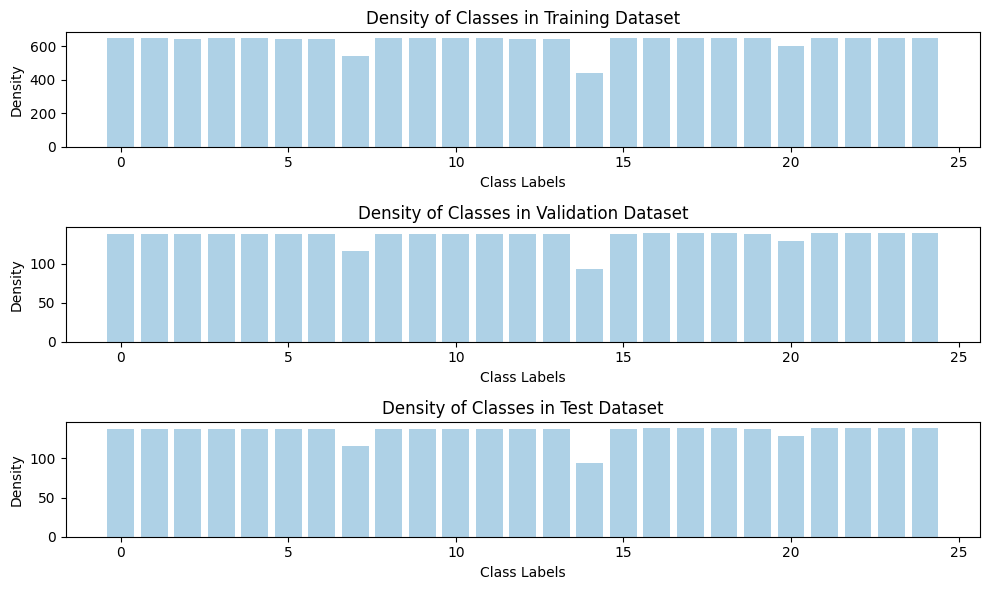

In [11]:
plt.figure(figsize=(10, 6))

plt.subplot(3, 1, 1)
plt.bar(dftrain['labels'].value_counts().index, dftrain['labels'].value_counts().values, color='#AED1E6')
plt.xlabel('Class Labels')
plt.ylabel('Density')
plt.title(f'Density of Classes in Training Dataset')

plt.subplot(3, 1, 2)
plt.bar(dfval['labels'].value_counts().index, dfval['labels'].value_counts().values, color='#AED1E6')
plt.xlabel('Class Labels')
plt.ylabel('Density')
plt.title(f'Density of Classes in Validation Dataset')

plt.subplot(3, 1, 3)
plt.bar(dftest['labels'].value_counts().index, dftest['labels'].value_counts().values, color='#AED1E6')
plt.xlabel('Class Labels')
plt.ylabel('Density')
plt.title(f'Density of Classes in Test Dataset')

plt.tight_layout()
plt.show()

Podemos afirmar que los tres subconjuntos son proporcionales entre sí. No obstante, se puede advertir que, bien si la mayoría de las clases tienen bases de datos muy similares en tamaño, existen algunas clases cuyo número de imágenes se reduce a alrededor del 60% en comparación con el resto de especies. Más adelante, se comprobarán las consecuencias que ello tiene en el rendimiento e impacto del modelo.

La función `prepare_load` que se presenta a continuación se diseñó con el propósito de preparar y cargar datos de imágenes para su utilización en el entrenamiento de la red neuronal convolucional. En su implementación, se inician dos listas, `data` y `labels`, destinadas a almacenar las imágenes y sus respectivas etiquetas. La iteración sobre las filas del DataFrame `train_clase` se lleva a cabo para acceder a las rutas de las imágenes y sus etiquetas asociadas.

Durante cada iteración, se realiza un proceso de transformación que incluye la verificación de la accesibilidad de la imagen. En caso de que la imagen no sea accesible, se imprime un mensaje indicando que está dañada, y se omite la iteración actual. Posteriormente, la imagen se redimensiona al tamaño especificado (`image_size, image_size`), se convierte al espacio de color RGB mediante la biblioteca OpenCV, y se normalizan los valores de píxeles para garantizar que estén en el rango [0, 1].

La imagen procesada junto con su etiqueta correspondiente se agregan a las listas `data` y `labels`, respectivamente, en cada iteración. Finalmente, las listas se convierten en arrays numpy utilizando la función `np.array()` y se retornan como una tupla. Estos arrays resultantes son apropiados para ser utilizados como entrada durante el entrenamiento de una red neuronal convolucional, facilitando así la manipulación eficiente de datos en este contexto.

Adicionalmente, se destaca que, al valernos de la información contenida en las tablas, generamos arrays que representan la información de las imágenes del conjunto de datos. Esta transformación de imágenes a arrays acelera el tratamiento de los datos durante el entrenamiento de la red convolucional. Además, se implementa una medida de control de valores atípicos que permite omitir la carga de directorios cuyas imágenes están dañadas o no son accesibles, mejorando así la integridad y calidad del conjunto de datos utilizado en el proceso de entrenamiento.

In [12]:
def prepare_load(train_clase, image_size):

    data = []
    labels = []

    for i in range(len(train_clase.iloc[:, 0])):
      img = cv2.imread(str(train_clase.iloc[i, 0]))
      # si no se puede acceder a la imagen
      if img is None:
            print(f"Imagen dañada: {i} {str(train_clase.iloc[i, 0])}")
            continue
      img = cv2.resize(img, (image_size, image_size))
      img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
      # Normalización
      img = img.astype(np.float32)/255.

      data.append(img)
      labels.append(train_clase.iloc[i, 1])

    return np.array(data), np.array(labels)

En este caso, se ha llegado a la conclusión de que un tamaño de imagen **128 x 128** ofrece una resolución lo suficientemente buena para que el modelo identifique patrones con mayor precisión, aun sin exceder las capacidades de memoria del entorno de ejecución.

In [13]:
image_size = 128

train_images, train_labels = prepare_load(dftrain, image_size)
val_images, val_labels = prepare_load(dfval, image_size)
test_images, test_labels = prepare_load(dftest, image_size)

Imagen dañada: 9184 ./25-indian-bird-species-with-226k-images/training_set/training_set/Ruddy Shelduck/ML220226881.jpg
Imagen dañada: 13942 ./25-indian-bird-species-with-226k-images/training_set/training_set/Sarus Crane/ML113680271.jpg
Imagen dañada: 2791 ./25-indian-bird-species-with-226k-images/training_set/training_set/Red-Wattled Lapwing/ML48543381.jpg


De las 26000 imágenes disponibles en el conjunto de datos original, se encuentra que no se puede acceder a 3 de ellas desde su ruta de directorio. A partir de esta, se ha comprobado desde la plataforma de *Kaggle* que su contenido está dañado y, por lo tanto, no se puede visualizar. Luego nuestra base de datos se reduce a un total de 22597 imágenes.

In [14]:
print(type(train_images))
print(type(train_labels))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


Una vez se comprueba que las imágenes y etiquetas están recogidas en objetos de tipo *numpy array*, nos aseguramos de que la forma de los arrays resultantes es la adecuada para su procesamieno en las redes convolucionales. Para ello, las imágenes deben ser tensores 3D con tres ejes: ancho, alto y profundidad o número de canales. Como se está trabajando sobre imágenes que siguen el modelo de color RGB, el número de canales será de 3 (rojo, verde y azul).

In [15]:
# Imprimir las formas de los arrays resultantes
print("Imágenes de entrenamiento:", train_images.shape)
print("Etiquetas de entrenamiento:", train_labels.shape)
print("Imágenes de validación:", val_images.shape)
print("Etiquetas de validación:", val_labels.shape)
print("Imágenes de prueba:", test_images.shape)
print("Etiquetas de prueba:", test_labels.shape)

Imágenes de entrenamiento: (15840, 128, 128, 3)
Etiquetas de entrenamiento: (15840,)
Imágenes de validación: (3399, 128, 128, 3)
Etiquetas de validación: (3399,)
Imágenes de prueba: (3378, 128, 128, 3)
Etiquetas de prueba: (3378,)


Antes de construir la red convolucional, se comprueba que la forma de las imágenes es la adecuada para ello, es decir, se han normalizado correctamente los valores del tensor.

In [16]:
print(train_images[0])

[[[0.8352941  0.79607844 0.5137255 ]
  [0.85490197 0.80784315 0.5176471 ]
  [0.8392157  0.7921569  0.50980395]
  ...
  [0.5647059  0.5686275  0.34509805]
  [0.5529412  0.5568628  0.32941177]
  [0.54901963 0.54509807 0.33333334]]

 [[0.84705883 0.80784315 0.5254902 ]
  [0.85490197 0.80784315 0.5254902 ]
  [0.8392157  0.7882353  0.50980395]
  ...
  [0.5647059  0.56078434 0.3372549 ]
  [0.5529412  0.54509807 0.33333334]
  [0.5372549  0.5372549  0.34117648]]

 [[0.85490197 0.8039216  0.5294118 ]
  [0.8627451  0.80784315 0.5294118 ]
  [0.84313726 0.7882353  0.50980395]
  ...
  [0.5529412  0.54509807 0.34509805]
  [0.5529412  0.5372549  0.34117648]
  [0.53333336 0.5294118  0.34901962]]

 ...

 [[0.6        0.6        0.30980393]
  [0.54901963 0.5529412  0.25882354]
  [0.5254902  0.5254902  0.2901961 ]
  ...
  [0.3882353  0.4745098  0.5294118 ]
  [0.39215687 0.39607844 0.43529412]
  [0.3764706  0.3882353  0.41568628]]

 [[0.58431375 0.5294118  0.23137255]
  [0.5058824  0.49803922 0.31764707]


En este caso, cada valor en la matriz tridimensional representa la intensidad del color en un píxel específico. Los valores están normalizados en el rango [0, 1], donde 0 representa la ausencia total de ese color y 1 la intensidad máxima.

El formato de la matriz es el siguiente:
- La primera dimensión representa las filas de la imagen.
- La segunda dimensión representa las columnas de la imagen.
- La tercera dimensión representa los canales de color (en este caso, los canales son Rojo, Verde y Azul, RGB).


Esta representación normalizada es esencial antes de alimentar las imágenes a la red. La normalización ayuda a estandarizar los datos, facilitando el entrenamiento del modelo y mejorando la convergencia del mismo.

Por último, se procede a la graficación de una muestra de las imágenes de entrenamiento para comprobar que su extracción ha sido correcta. Además, resulta interesante conocer el aspecto de la base de datos antes de proceder a la construcción de la CNN para orientar el modelo en función de las características de las imágenes y la distribución de la información más relevante en estas.

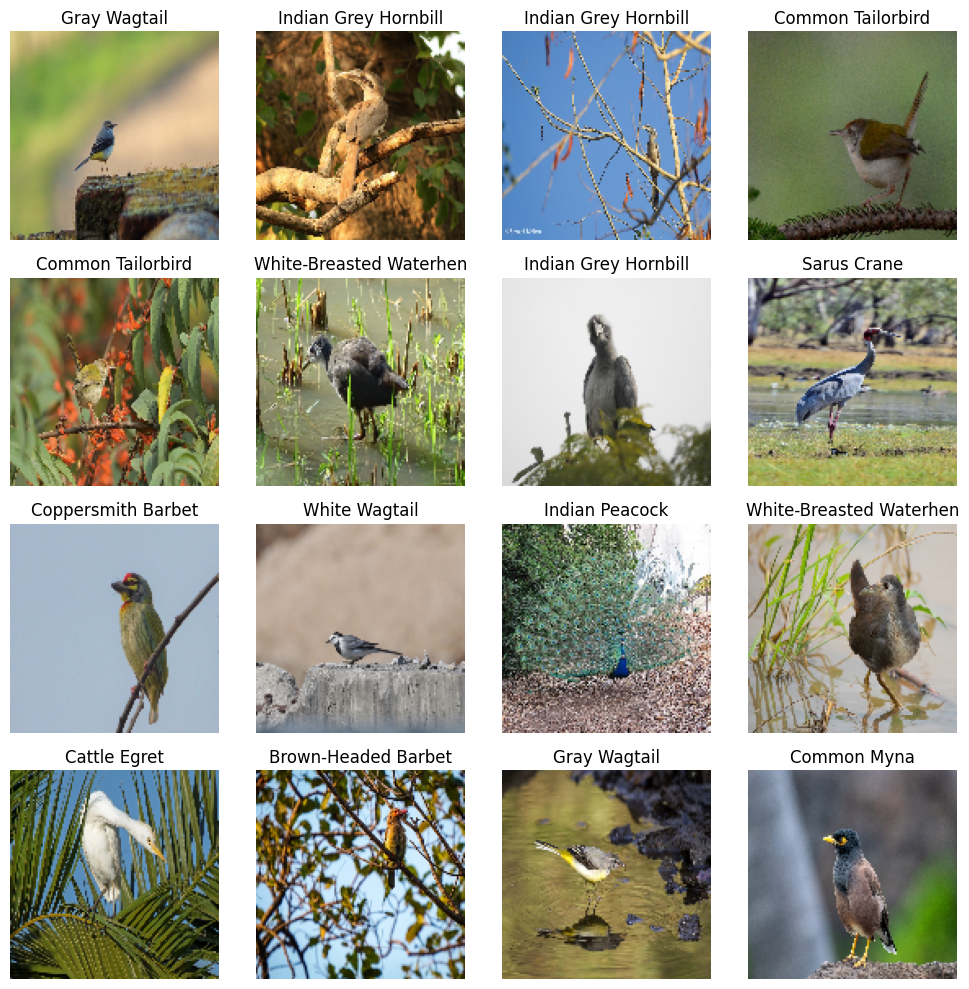

In [17]:
plt.figure(figsize=(10, 10))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(train_images[i])
    plt.title(pre.inverse_transform([train_labels[i]])[0])
    plt.axis('off')

plt.tight_layout()
plt.show()

Podemos hacer una primera predicción, estimando que el modelo será capaz de priorizar los patrones de las imágenes directamente relacionados con la fisionomía y complexión de las aves. Así, la construcción de la red ha de tomar estos elementos como principal motivo de estudio.

Además, se puede observar que, si bien la mayoría de los datos muestran las distintas especies centradas en la imagen, la posición de estas varía. Imágenes pertenecientes a la misma clase pueden capturar tanto al pájaro en reposo sobre una rama o el suelo como a este en pleno vuelo. Por lo tanto, la complejidad del problema no reside sólo en las diferencias físicas entre especies sino que el modelo ha de ser capaz de identificarlas en formas muy distintas. Para ello, resultará clave el uso de técnicas de aumento de datos más adelante.

Previo a la construcción de la red neuronal convolucional, se llevaron a cabo pruebas exhaustivas de diversos filtros como parte del proceso de Ingeniería de Características (I.C.). Estos filtros, que incluyeron técnicas como afilamiento, filtro gaussiano, filtro de la media, filtro de Sobel, y la transformada de Fourier, tenían como objetivo realzar diversas características, como bordes, con la intención de facilitar el trabajo del modelo en etapas posteriores. Sin embargo, es crucial destacar que ninguna de estas técnicas demostró mejorar la precisión en la clasificación de las imágenes.

Este resultado negativo no debe pasar desapercibido, ya que sugiere que, a pesar de la diversidad de enfoques utilizados en Ingeniería de Características, la calidad intrínseca de las fotografías es un factor determinante. Como se mencionó anteriormente, el conjunto de datos proporciona imágenes de alta resolución y detalle, lo que podría explicar la falta de mejora sustancial al aplicar filtros adicionales. Este hallazgo resalta la importancia de comprender la idoneidad de las técnicas utilizadas en el contexto específico del conjunto de datos, contribuyendo así a una toma de decisiones más informada durante la fase de preprocesamiento y diseño del modelo.

## Entrenamiento del modelo

**Arquitectura del modelo**

La construcción de la arquitectura del modelo partió de un primer diseño sencillo de dos capas convolucionales que diese resultados mejores a los de un modelo de referencia, es decir, la probabilidad de elegir una de las clases aleatoriamente y acertar en la predicción (4%). La fijación del número de bloques en 4 se obtuvo a partir de la evaluación de modelos con capas tanto por encima como por debajo de esta cifra para hallar el más óptimo. Una vez se conocía el número y dimensión de las capas convolucionales, se llegó a la conclusión de que tanto la función de activación *ReLU* como el optimizador *RMSProp* ofrecían un mejor rendimiento en comparación con otras alternativas como el optimizador *Adam* o las funciones *Leaky ReLU* y *Swish*. Por último, se dedujo que la construcción de bloques con doble capa convolucional en vez de capas sencillas aumentaba la precisión de la red.

En cuanto a las técnicas de control de sobreajuste, bien si el empleo de regularizadores de pesos en las capas no mostraban mejoras significativas, se observó progresos con la introducción de *Dropout*. Tras varias pruebas en las que se evaluó tasas de dropout entre 0.1 y 0.5, se concluyó que el rendimiento se maximizaba cuando se encontraba en el rango [0.2, 0.3].

Por lo tanto, tras diferentes pruebas, se llega a la conclusión de que la siguiente arquitectura de la red convolucional proporciona los mejores resultados en cuanto a la precisión en la identificación de las aves.

Varios estudios han demostrado que la función de activación ***ReLU***, así como el optimizador ***RMSProp*** presentan los mejores resultados en una amplia variedad de problemas, demostrando su carácter más general. Además, se configura la inicialización de los pesos en cada capa de forma que siga una distribución ***He Normal*** ya que mejora el comportamiento de la función de activación *ReLU*, según un estudio realizado en Delft University of Technology [3].

Se ha decidido dividir la red en cuatro bloques principales formados por dos capas convolucionales con ***Batch Normalization*** y una última capa de ***Pooling*** seguida de la regularización del modelo mediante la aplicación de ***Dropot***. Un estudio [4] demuestra la utilidad de su empleo tras capas de *MaxPooling*, luego se recurre a ello para maximizar el rendimiento. En este caso, se ha comprobado que su introducción en la red logra aumentar la precisión alrededor de un 2.5%. Dentro de cada capa convolucional, se recurre al tamaño de ventana más frecuente en este tipo de cuestiones (3, 3) y se aplica ***padding*** para evitar perder información relevante que se puede encontrar en los bordes de las imágenes. En cuanto al número de parámetros o neuronas por capa, se ha comprobado que la secuencia **64 - 128 - 256 - 512** por bloque tiene la mejor respuesta.

La arquitectura que caracteriza cada uno de estos bloques está inspirada en la red neuronal convolucional VGG-16, bien si se ha simplificado para responder adecuadamente a las limitaciones del entorno de ejecución [5].

Por último, cuando ya se han aplanado los tensores 3D y antes de implementar la capa densa *softmax*, se añade otra capa densa con *Batch Normalization*. Esta capa consigue que el modelo aprenda patrones todavía más complejos que contribuyan a una mayor capacidad de generalización, logrando mejores resultados en la clasificación. Además, el empleo de la capa de ***Dropout*** logra prevenir el sobreajuste. En concreto, de acuerdo a su implementación, introducir ruido en el 30% de los valores de los filtros consigue reducir los efectos de la casualidad en los patrones aprendidos. De esta forma, se consigue ignorar aquellas características que no resultan significativas.

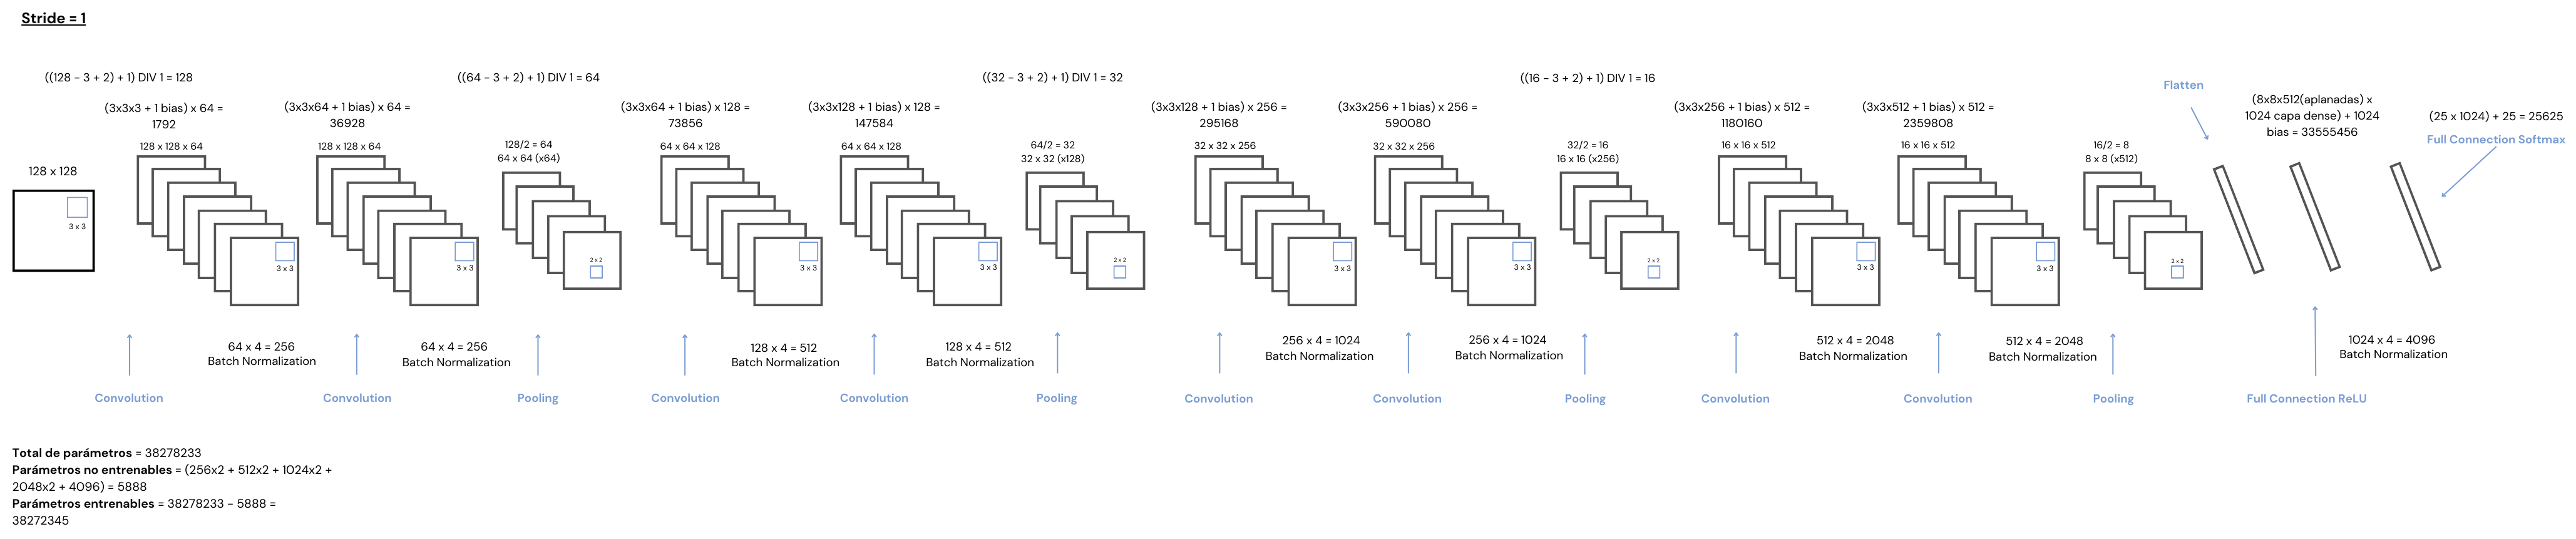

In [18]:
def build_model():

    initializer = HeNormal(123)

    model = models.Sequential()

    # Capas conovolucionales

    model.add(Conv2D(64, (3, 3), padding='same', activation='relu',
                     input_shape=(image_size, image_size, 3),
                     kernel_initializer=initializer))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu',
                     kernel_initializer=initializer))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))

    model.add(Conv2D(128, (3, 3), padding='same', activation='relu',
                     kernel_initializer=initializer))
    model.add(BatchNormalization())
    model.add(Conv2D(128, (3, 3), padding='same', activation='relu',
                     kernel_initializer=initializer))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))

    model.add(Conv2D(256, (3, 3), padding='same', activation='relu',
                     kernel_initializer=initializer))
    model.add(BatchNormalization())
    model.add(Conv2D(256, (3, 3), padding='same', activation='relu',
                     kernel_initializer=initializer))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))

    model.add(Conv2D(512, (3, 3), padding='same', activation='relu',
                     kernel_initializer=initializer))
    model.add(BatchNormalization())
    model.add(Conv2D(512, (3, 3), padding='same', activation='relu',
                     kernel_initializer=initializer))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))

    model.add(Flatten())
    model.add(Dense(1024, activation='relu',
                    kernel_initializer=initializer))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))

    model.add(Dense(num_classes, activation='softmax', name='output_class'))

    # Compilación del modelo
    model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy',
                  metrics='accuracy')

    return model

A continuación, se aprovecha la capacidad de procesamiento paralelo de múltiples GPUs utilizando TensorFlow. Para ello, se utiliza la clase `MirroredStrategy` para implementar la estrategia de distribución de datos llamada "espejo" (mirroring) en el contexto de entrenamiento distribuido.

En términos simples, esta estrategia se utiliza cuando se desea entrenar un modelo en paralelo en múltiples GPUs. La idea es crear una copia del modelo en cada GPU disponible y distribuir los datos entre ellas. Cada GPU realiza el cálculo de los gradientes localmente en los datos asignados a esa GPU y luego los gradientes se combinan entre todas las GPUs para realizar una actualización única de los pesos del modelo.

Este enfoque de "mirroring" o "espejo" permite acelerar el entrenamiento al procesar diferentes lotes de datos simultáneamente en cada GPU, lo cual es beneficioso especialmente cuando se trabaja con conjuntos de datos grandes. TensorFlow se encarga de la sincronización entre las GPUs y facilita la gestión del proceso de entrenamiento distribuido.

Con la sentencia `with strategy.scope():`, conseguimos que todo el código de debajo se ejecute en el contexto de la estrategia definida anteriormente. Dentro de este contexto, se llama a la función `build_model()` para construir el modelo. Es importante destacar que TensorFlow se encargará de distribuir automáticamente y replicar el modelo en todas las GPUs disponibles gracias a la estrategia establecida.

Tras la construcción del modelo, la sentencia `model.summary()` imprime un resumen detallado del modelo creado. Este resumen incluye información sobre la arquitectura del modelo, la cantidad de parámetros, y otras configuraciones clave.





In [19]:
strategy = tf.distribute.MirroredStrategy()

with strategy.scope():
  model = build_model()

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 64)      1792      
                                                                 
 batch_normalization (Batch  (None, 128, 128, 64)      256       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 64)      36928     
                                                                 
 batch_normalization_1 (Bat  (None, 128, 128, 64)      256       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 64)        0         
 D)                                                              
                                                        

Una vez se ha diseñado la arquitectura del modelo, se procede a evaluar su comportamiento sobre los datos disponibles. No obstante, se recurre antes a la implementación de la clase de Keras ***ImageDataGenerator***. Esto permite generar variaciones de las imágenes originales, aplicando transformaciones como rotación, desplazamiento horizontal y vertical, zoom, inclinación y volteo horizontal. De esta manera, se consigue aumentar la variabilidad en el modelo y conseguir una mayor capacidad de generalizar en el reconocimiento de patrones. Así, se consiguen lotes de datos de imágenes aumentadas en tiempo real, ahorrando espacio de memoria y mejorando el rendimiento de la red neuronal.

Los valores que cada uno de los hiperparámetros dentro de esta clase reciben son relativamente bajos porque se pretende imitar un comportamiento más bien cercano al de la naturaleza, es decir, se quiere que las imágenes alteradas sigan siendo cercanas a la realidad.

Por otro lado, se emplearán funciones *Callback* como las siguientes para monitorizar el proceso de entrenamiento:
* **Early Stopping**: de acuerdo a la implementación de esta función, se finalizará el entrenamiento cuando la precisión de validación deje de mejorar durante cuatro épocas seguidas. Esto evita fijar manualmente el número de épocas óptimo que prevenga el sobreajuste del modelo.

* **Reduce Learning Rate On Plateau**: cada vez que la precisión de validación deje de mejorar durante dos épocas, la tasa de aprendizaje disminuye con un factor de 0.1. Así, se reduce el paso para aproximarse con mayor precisión a la minimización de la función de pérdida, contribuyendo a una convergencia más afinada.

In [20]:
num_epochs = 60

datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    shear_range=0.15,
    horizontal_flip=True
)

datagen.fit(train_images)

# Callback Early Stopping
callback1 = keras.callbacks.EarlyStopping(
    monitor="val_accuracy",
    patience=4,
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.1,
                              patience=2)

# Entrenamiento del modelo
history = model.fit(datagen.flow(train_images, train_labels, batch_size=32),
                    epochs=num_epochs, validation_data=(val_images, val_labels), callbacks=[callback1, reduce_lr])

# Evaluación del modelo
loss, class_accuracy= model.evaluate(test_images, test_labels)

Epoch 1/60
495/495 [==============================] - 127s 220ms/step - loss: 3.4422 - accuracy: 0.1278 - val_loss: 2.8526 - val_accuracy: 0.2583 - lr: 0.0010
Epoch 2/60
495/495 [==============================] - 108s 217ms/step - loss: 2.6455 - accuracy: 0.2701 - val_loss: 2.7270 - val_accuracy: 0.3419 - lr: 0.0010
Epoch 3/60
495/495 [==============================] - 107s 216ms/step - loss: 2.1938 - accuracy: 0.3777 - val_loss: 1.6884 - val_accuracy: 0.4910 - lr: 0.0010
Epoch 4/60
495/495 [==============================] - 107s 215ms/step - loss: 1.7890 - accuracy: 0.4773 - val_loss: 1.5076 - val_accuracy: 0.5519 - lr: 0.0010
Epoch 5/60
495/495 [==============================] - 106s 215ms/step - loss: 1.4919 - accuracy: 0.5623 - val_loss: 1.2526 - val_accuracy: 0.6340 - lr: 0.0010
Epoch 6/60
495/495 [==============================] - 107s 215ms/step - loss: 1.2797 - accuracy: 0.6237 - val_loss: 1.1821 - val_accuracy: 0.6634 - lr: 0.0010
Epoch 7/60
495/495 [==========================

**Evaluación gráfica de los resultados**

A continuación, se representa gráficamente tanto el progreso como la comparación de la pérdida y precisión en los conjuntos de entrenamiento y validación. Tiene como objetivo proporcionar una visión más general del comportamiento de la red para lograr un mayor entendimiento de su funcionamiento y cómo este se refleja en los resultados.

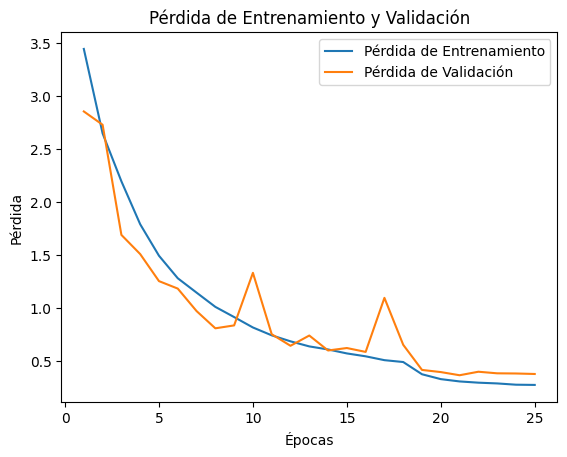

In [21]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, label='Pérdida de Entrenamiento')
plt.plot(epochs, val_loss, label='Pérdida de Validación')
plt.title('Pérdida de Entrenamiento y Validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.show()

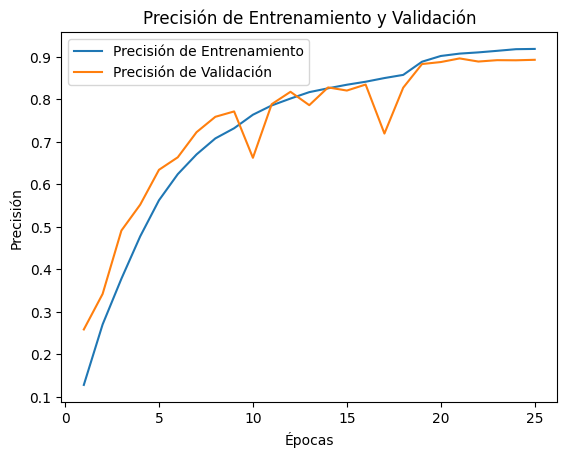

In [22]:
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='Precisión de Entrenamiento')
plt.plot(epochs, val_acc, label='Precisión de Validación')
plt.title('Precisión de Entrenamiento y Validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

plt.show()

A la luz de los resultados obtenidos en la ejecución del modelo, el entrenamiento de la CNN ha logrado mantener un carácter generalizador durante su transcurso ya que la precisión en los datos de validación ha conseguido mantenerse por encima o muy cerca de aquella que se obtenía para las imágenes de entrenamiento en cada época. Estas ligeras diferencias no son indicativas de un sobreajuste significativo. Además, los picos negativos abruptos de la precisión de validación que se observan en la gráfica se corresponden con las épocas en las que la tasa de aprendizaje se había modificado por la ausencia de mejoras.

Asimismo, los resultados obtenidos sobre el set de prueba (≈90%) reflejan la capacidad de aprendizaje e identificación que la red convolucional ha logrado, mostrando su aptitud razonable para clasificar con éxito imágenes desconocidas.

No obstante, el funcionamiento de esta red en un entorno más complejo y dinámico como es su implementación en programas de protección de especies, entre otros, requiere de una disponibilidad mayor de datos así como de actualizaciones que aseguren el rendimiento más óptimo y, por lo tanto, la plena confianza en su empleo.

## Hallazgos

**Mapa de calor (HeatMap)**

A continuación, se traza el mapa de calor como resultado de las predicciones que el modelo ha logrado hacer sobre los datos de prueba.

La principal función del heatmap o mapa de calor es la de una representación visual rápida e intuitiva del comportamiento del modelo en la clasificación de las imágenes, destacando zonas donde hay más aciertos o errores. Así, esta herramienta resulta de gran utilidad en la localización de clases o áreas más conflictivas en las que el modelo no consigue generalizar igual de bien y que necesitan un mayor nivel de atención.

En este caso, se necesita recurrir al cálculo de la matriz de confusión para trazarlo.

106/106 [==============================] - 4s 35ms/step


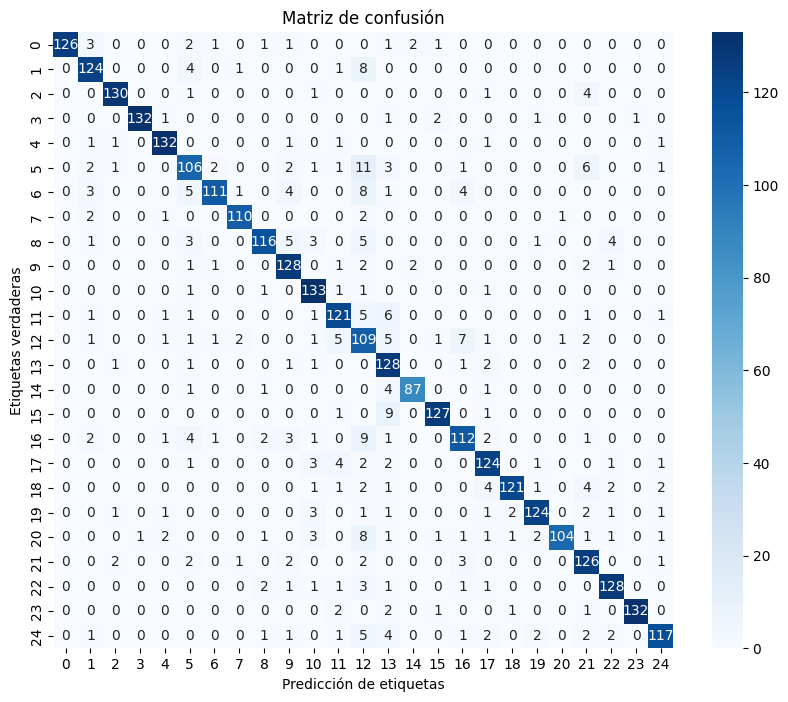

In [23]:
# Se extraen las predicciones que el modelo ha hecho sobre las imágenes de test
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

# Cálculo de la matriz de confusión
conf_matrix = confusion_matrix(test_labels, predicted_labels)

# Se grafican los resultados
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.arange(num_classes), yticklabels=np.arange(num_classes))
plt.xlabel('Predicción de etiquetas')
plt.ylabel('Etiquetas verdaderas')
plt.title('Matriz de confusión')
plt.show()

In [24]:
recovered_label = pre.inverse_transform([14])[0]
print(recovered_label)

Indian Pitta


In [25]:
recovered_label = pre.inverse_transform([12])[0]
print(recovered_label)

Indian Grey Hornbill


La diagonal principal de la matriz de confusión se corresponde con las predicciones correctas que el modelo ha hecho para las distintas especies. De acuerdo a los resultados generados en el gráfico, la gran mayoría de las predicciones que el modelo ha realizado sobre los datos de prueba están concentradas en esta diagonal. Consecuentemente, se puede afirmar que el modelo presenta una precisión más bien homogénea a lo largo de las diferentes clases de clasificación; ha conseguido acertar en la mayor parte de las predicciones para cada una de las distintas especies.

Cabe destacar que la clase 14, que se corresponde con la especie 'Indian Pitta', presenta el menor número número de aciertos, es decir, el valor más pequeño en la diagonal de la matriz. No obstante, si se vuelve a estudiar la gráfica de representatividad de las clases, se logra comprobar que la base de datos de esta especie es la más limitada, es decir, se tiene una menor disponibilidad de imágenes de este tipo de aves. Por lo tanto, a pesar de la excasez de datos, el modelo ha logrado superar ese desequilibrio y genealizar razonablemente bien, mostrando un comportamiento imparcial o no sesgado.

Sin embargo, se puede observar que una de las clases más conflictivas es la número 12 o  especie 'Indian Grey Hornbill'. Como se ha podido comprobar en el visualizado previo de imágenes, las aves de la India se caracterizan por tener un plumaje de colores vivos. A pesar de ello, esta especie en concreto toma colores en la escala de grises y marrones, muy parecidos a los de las ramas o superficies que se pueden encontrar en la naturaleza. Por lo tanto, es posible que el modelo, a la hora de analizar imágenes en las que elementos como las ramas de los árboles destacaban bastante, las haya identificado como 'Indian Grey Hornbill' de forma errónea. Así, se podría explicar una tasa de precisión bastante menor a la del resto de clases.

Por lo tanto, se puede concluir que una de las principales mejoras del presente trabajo está relacionada con la calidad de la base de datos, con un tamaño y homogeneidad lo suficientemente buenos para lograr que la red neuronal sea capaz de generalizar correctamente y muestre un rendimiento similar para todas las clases.

## Trabajo futuro

Como se ha mencionado en resultados anteriores, uno de los principales obstáculos que limita el rendimiento de la red neuronal convolucional es la disponibilidad de un conjunto de datos de calidad lo suficientemente amplio. Bien si las imágenes observadas presentaban una resolución óptima para su procesamiento, se ha comprobado que la cantidad de datos utilizables es más bien limitada y no sigue una repartición completamente homogénea entre clases o especies. Por lo tanto, el logro de un modelo que garantizase un desempeño óptimo en situaciones del mundo real y resultase de utilidad se obtendría mediante la recogida exhaustiva de imágenes etiquetadas sobre estas especies.

Asimismo, los avances en el presente documento podrían no limitarse a las 25 especies de aves que se han estudiado. Una de las aplicaciones más interesantes se encuentra en el análisis de la viabilidad de su extrapolación para el estudio de especies aviares distintas a las ya vistas y su clasificación.


Otra posible expansión significativa de este trabajo consistiría en la inclusión de archivos de audio en lugar de limitarse únicamente a imágenes. Esta ampliación permitiría la clasificación de aves a través de sus cantos y vocalizaciones, como se ha evidenciado en trabajos anteriores, como el estudio sobre "Audio Based Bird Species Identification using Deep Learning Techniques" [2]. Incorporar esta dimensión auditiva no solo enriquecería la capacidad del modelo para identificar especies, sino que también abriría nuevas perspectivas para la investigación en el campo de la identificación de aves basada en técnicas de aprendizaje profundo.


Los hallazgos de este proyecto tienen una aplicación práctica relevante en la gestión de la biodiversidad. Imaginando su implementación en reservas naturales, el modelo podría utilizarse para monitorear aves mediante cámaras. La capacidad del modelo para identificar y clasificar una amplia gama de especies proporcionaría datos en tiempo real sobre la salud y diversidad de las poblaciones aviares. Esto facilitaría la toma de decisiones para la conservación, permitiendo una gestión más efectiva de las áreas naturales y liberando recursos humanos para tareas estratégicas. En resumen, los resultados de este proyecto no solo avanzarían la investigación científica, sino que también tendrían un impacto directo en la preservación de la biodiversidad en entornos naturales.

## Bibliografía

**[1]** S. Raj, “Image based Bird Species Identification using Convolutional Neural Network,” International Journal of Engineering Research and Technology, vol. V9, no. 06, Jun. 2020, doi: 10.17577/ijertv9is060279.

**[2]** E. Sprengel, M. Jäggi, Y. Kilcher, and T. Hofmann, “Audio Based Bird Species Identification using Deep Learning Techniques,” Cross-Language Evaluation Forum, pp. 547–559, Jan. 2016, [Online]. Available: http://ceur-ws.org/Vol-1609/16090547.pdf

**[3]**  L. Datta, “A Survey on Activation Functions and their relation with Xavier and He   Normal Initialization,” arXiv (Cornell University), Mar. 2020, doi: 10.48550/arxiv.2004.06632.

**[4]**  H. Wu and X. Gu, “Towards dropout training for convolutional neural networks,” Neural Networks, vol. 71, pp. 1–10, Nov. 2015, doi: 10.1016/j.neunet.2015.07.007.

**[5]**  S. Mascarenhas and M. Agarwal, "A comparison between VGG16, VGG19 and ResNet50 architecture frameworks for Image Classification," 2021 International Conference on Disruptive Technologies for Multi-Disciplinary Research and Applications (CENTCON), Bengaluru, India, 2021, pp. 96-99, doi: 10.1109/CENTCON52345.2021.9687944.